In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy
from tvb.simulator.plot.head_plotter_3d import HeadPlotter3D
from tvb.datatypes import cortex, connectivity, local_connectivity

# Display the local connectivity kernel definining the local coupling strength for one focal point

When defining stimuli on the cortical surface, it's useful to visualize the spatial pattern being implemented:

Here, we'll redefine the local connectivity kernel,

WARNING  File 'hemispheres' not found in ZIP.


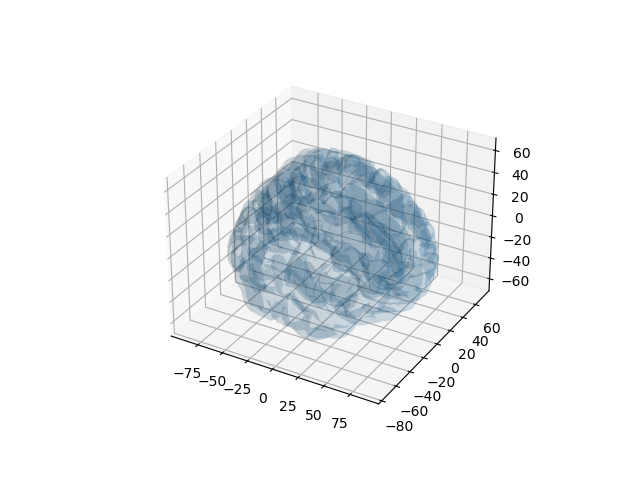

In [2]:
hp = HeadPlotter3D()

# configure cortical surface
ctx = cortex.Cortex.from_file()
ctx.region_mapping_data.connectivity = connectivity.Connectivity.from_file()
loc_conn = local_connectivity.LocalConnectivity(cutoff=20.0, surface=ctx.region_mapping_data.surface)
loc_conn.equation.parameters['sigma'] = 10.0
loc_conn.equation.parameters['amp'] = 1.0
ctx.local_connectivity = loc_conn
ctx.coupling_strength = numpy.array([0.0115])
ctx.configure()

# plot 
plt.figure()
ax = plt.subplot(111, projection='3d')
x, y, z = ctx.vertices.T
ax.plot_trisurf(x, y, z, triangles=ctx.triangles, alpha=0.1, edgecolor='none')